#### Importing the Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [6]:
dataset = pd.read_csv('DataScienceJobs.csv')
dataset.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [9]:
#calculates the percentage of missing values in each column of the dataset DataFrame.
dataset.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [11]:
#creates a list called cols that contains the names of the columns in the dataset DataFrame for which the proportion of missing values is between 0% and 5%.
cols = [var for var in dataset.columns if dataset[var].isnull().mean() < 0.05 and dataset[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
dataset[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
5055,0.754,no_enrollment,Masters,10.0,47.0
4745,0.624,no_enrollment,Graduate,13.0,NaN
6525,0.920,no_enrollment,High School,3.0,38.0
15869,0.743,NaN,Graduate,2.0,22.0
18966,0.624,no_enrollment,Graduate,5.0,116.0


In [17]:
#divides the number of rows in the new DataFrame by the number of rows in the original df DataFrame, giving the proportion of rows in the original DataFrame that have non-missing values for all columns in cols.
len(dataset[cols].dropna()) / len(dataset[cols])

0.8968577095730244

#### Dropping all the rows with missing values

In [19]:
new_dataset = dataset[cols].dropna()
dataset.shape, new_dataset.shape

((19158, 13), (17182, 5))

#### Visualising columns before and after Complete Case Analysis (for numerical columns)

<AxesSubplot:>

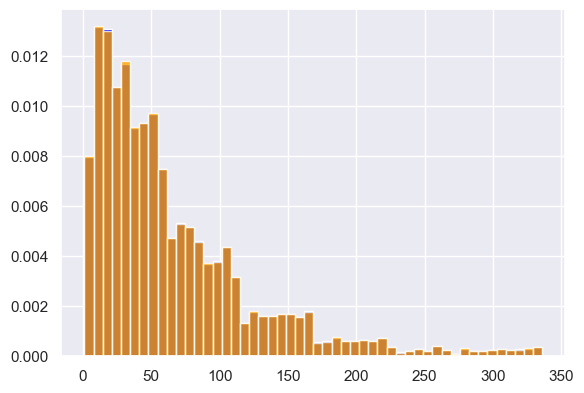

In [40]:
# creates two histograms on a single plot that compare the distribution of values for two columns in the dataset and new_dataset.
sns.set(rc={'figure.figsize':(6.5,4.5)})
fig = plt.figure()
ax = fig.add_subplot(111) #adds a single subplot to the figure object, with a single row and a single column.

dataset['training_hours'].hist(bins=50, ax=ax, density=True, color='blue')
#creates a histogram of the values in the "training_hours" column of the new_dataset DataFrame, with 50 bins, plotted on the same ax subplot.
new_dataset['training_hours'].hist(bins=50, ax=ax, color='orange', density=True, alpha=0.8)

<AxesSubplot:>

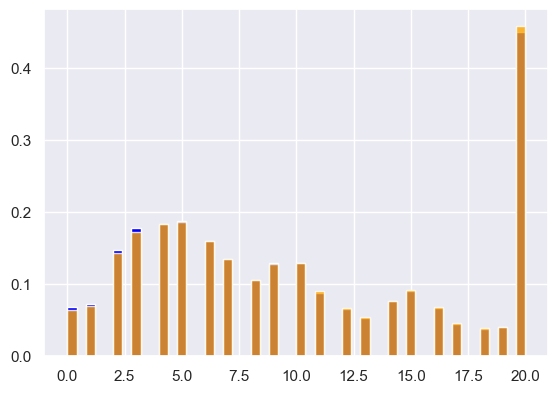

In [44]:
sns.set(rc={'figure.figsize':(6.5,4.5)})
fig = plt.figure()
ax = fig.add_subplot(111)

dataset['experience'].hist(bins=50, ax=ax, density=True, color='blue')
new_dataset['experience'].hist(bins=50, ax=ax, color='orange', density=True, alpha=0.8)

<AxesSubplot:>

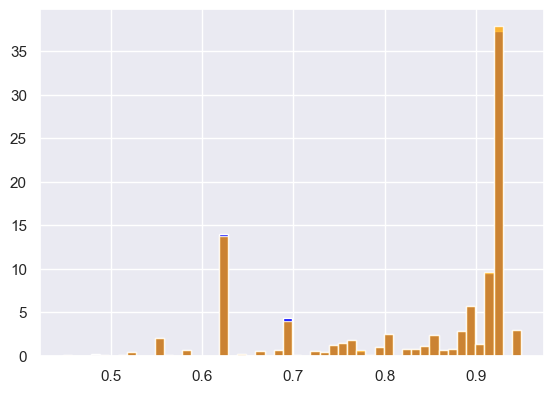

In [46]:
sns.set(rc={'figure.figsize':(6.5,4.5)})
fig = plt.figure()
ax = fig.add_subplot(111)

dataset['city_development_index'].hist(bins=50, ax=ax, density=True, color='blue')
new_dataset['city_development_index'].hist(bins=50, ax=ax, color='orange', density=True, alpha=0.8)

#### Checking the proportionality of distinct values after Complete Case Analysis (for categorical columns)

In [56]:
#creates a new DataFrame dataframe that contains two columns, each representing the proportion of values for the "enrolled_university" column in the dataset and new_dataset DataFrames, respectively.
dataframe = pd.DataFrame({'Original':dataset['enrolled_university'].value_counts() / len(dataset), 'CCA':new_dataset['enrolled_university'].value_counts() / len(new_dataset)})
dataframe

,Original,CCA
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [57]:
dataframe = pd.DataFrame({'Original':dataset['education_level'].value_counts() / len(dataset), 'CCA':new_dataset['education_level'].value_counts() / len(new_dataset)})
dataframe

,Original,CCA
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
